<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-2023/blob/main/3.Regresi%C3%B3n_lineal_y_log%C3%ADstica/RegLineal_RegLogistica_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

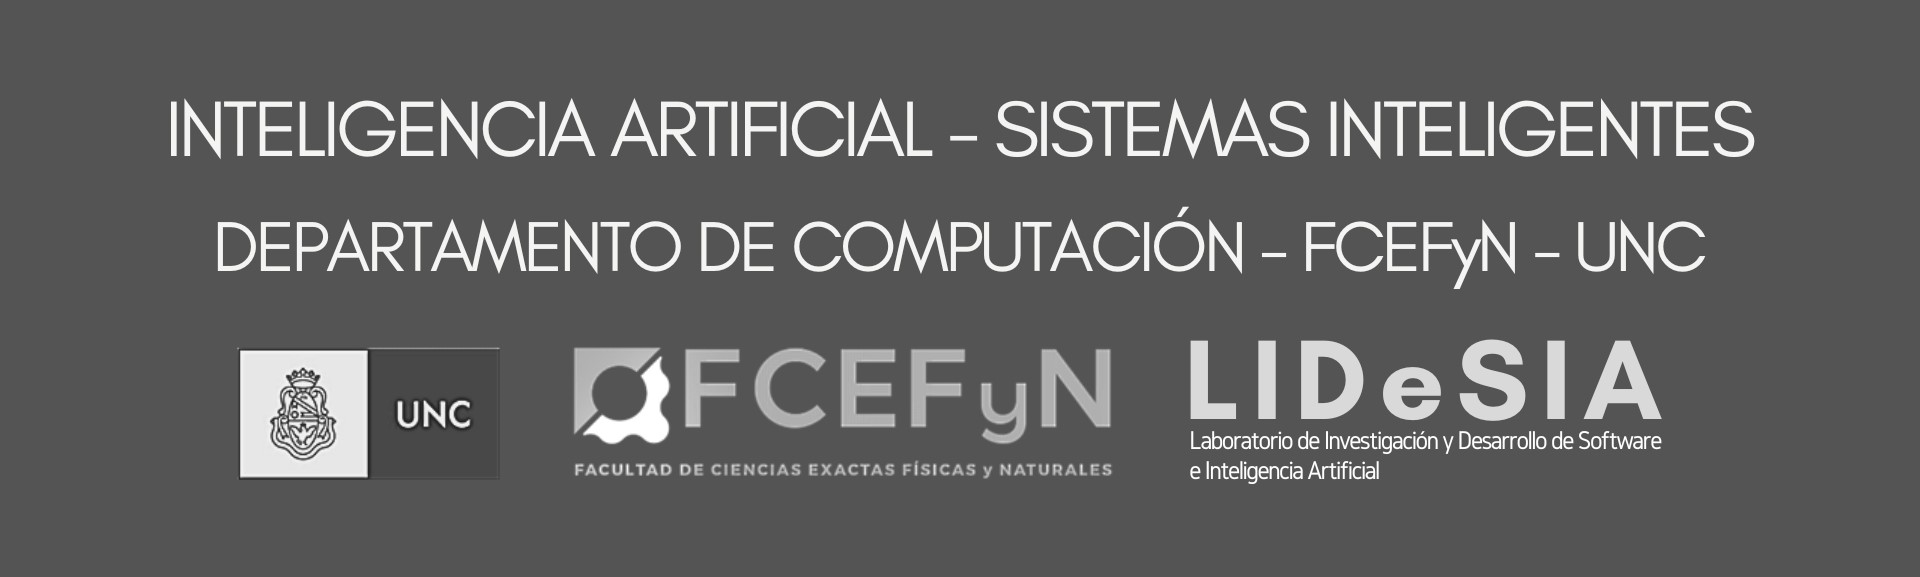

# Regresión lineal y logistica
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

---

*   Autor/es: Lucas Signorini (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

---



##Regresión Lineal

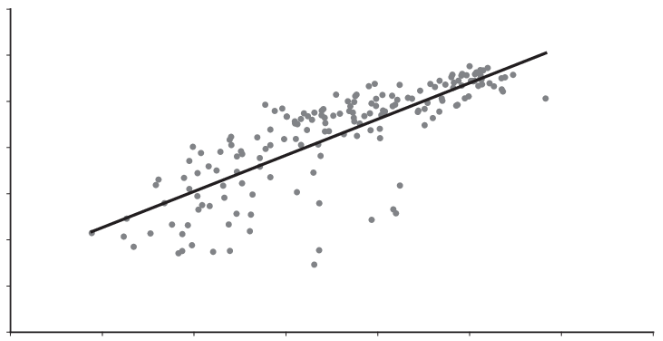

Cargando las librerias

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

Cargando la base de datos

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving clima_curada.csv to clima_curada (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
curada=pd.read_csv('/content/clima_curada.csv')
curada

,MinTemp,MaxTemp,Rainfall,Evaporation,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,sunshine,windspeed,speed9am
0,8.0,24.3,0.0,3.4,NW,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes,6.3,30.0,6.0
1,14.0,26.9,3.6,4.4,W,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes,9.7,39.0,4.0
2,13.7,23.4,3.6,5.8,NNE,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes,3.3,85.0,6.0
3,13.3,15.5,39.8,7.2,W,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes,9.1,54.0,30.0
4,7.6,16.1,2.8,5.6,ESE,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No,10.6,50.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,NW,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No,12.1,76.0,7.0
362,7.1,28.4,0.0,11.6,NNW,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No,12.7,48.0,2.0
363,12.5,19.9,0.0,8.4,ENE,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No,5.3,43.0,11.0
364,12.5,26.9,0.0,5.0,WNW,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No,7.1,46.0,6.0


In [ ]:
curada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       366 non-null    float64
 1   MaxTemp       366 non-null    float64
 2   Rainfall      366 non-null    float64
 3   Evaporation   366 non-null    float64
 4   WindDir3pm    365 non-null    object 
 5   WindSpeed3pm  366 non-null    int64  
 6   Humidity9am   366 non-null    int64  
 7   Humidity3pm   366 non-null    int64  
 8   Pressure9am   366 non-null    float64
 9   Pressure3pm   366 non-null    float64
 10  Cloud9am      366 non-null    int64  
 11  Cloud3pm      366 non-null    int64  
 12  Temp9am       366 non-null    float64
 13  Temp3pm       366 non-null    float64
 14  RainToday     366 non-null    object 
 15  RISK_MM       366 non-null    float64
 16  RainTomorrow  366 non-null    object 
 17  sunshine      366 non-null    float64
 18  windspeed     366 non-null    

In [ ]:
filaConNulo = curada[curada.isnull().any(1)]
filaConNulo

,MinTemp,MaxTemp,Rainfall,Evaporation,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,sunshine,windspeed,speed9am
222,8.6,13.7,6.2,2.2,NaN,0,97,94,1027.8,1024.3,8,8,10.3,11.6,Yes,4.8,Yes,0.0,31.0,2.0


Podemos ocuparnos del NaN:
- Reemplazando: filaConNulo.replace(np.nan,"ValorMasComun")
- Borrando la fila: filaConNulo.dropna(axis = 0, how = "any")

In [ ]:
curada = curada.dropna(axis=0,how='any')

Definiendo input y target

In [ ]:
target=np.array(curada.Humidity3pm)
data_input = curada.drop(columns= ['Humidity3pm', "WindDir3pm", "RainToday","RainTomorrow"])
input=np.array(data_input)

In [ ]:
input

array([[ 8. , 24.3,  0. , ...,  6.3, 30. ,  6. ],
       [14. , 26.9,  3.6, ...,  9.7, 39. ,  4. ],
       [13.7, 23.4,  3.6, ...,  3.3, 85. ,  6. ],
       ...,
       [12.5, 19.9,  0. , ...,  5.3, 43. , 11. ],
       [12.5, 26.9,  0. , ...,  7.1, 46. ,  6. ],
       [12.3, 30.2,  0. , ..., 12.6, 78. , 31. ]])

In [ ]:
target #Humedad3pm

array([29, 36, 69, 56, 49, 57, 47, 57, 48, 32, 34, 35, 29, 20, 16, 22, 23,
       26, 25, 27, 26, 72, 79, 57, 31, 48, 55, 31, 80, 49, 90, 46, 60, 40,
       63, 54, 74, 42, 24, 37, 63, 51, 49, 37, 36, 86, 40, 43, 54, 74, 48,
       62, 49, 43, 52, 35, 64, 44, 30, 18, 20, 20, 14, 55, 45, 40, 34, 36,
       44, 45, 25, 24, 28, 35, 57, 26, 62, 42, 55, 88, 71, 58, 46, 38, 29,
       32, 28, 28, 18, 22, 29, 49, 49, 44, 38, 76, 71, 41, 76, 58, 51, 37,
       34, 60, 73, 37, 32, 40, 46, 42, 38, 31, 56, 42, 32, 34, 35, 27, 25,
       78, 34, 31, 37, 28, 28, 35, 24, 34, 39, 33, 28, 18, 23, 18, 15, 15,
       17, 22, 30, 48, 35, 62, 64, 44, 68, 93, 50, 36, 35, 30, 34, 42, 34,
       26, 40, 33, 27, 35, 48, 45, 49, 28, 29, 32, 56, 40, 36, 39, 44, 43,
       51, 65, 34, 49, 43, 55, 42, 34, 51, 60, 40, 40, 54, 38, 42, 42, 41,
       53, 43, 44, 36, 41, 52, 47, 34, 44, 40, 69, 78, 53, 36, 52, 47, 43,
       49, 43, 48, 50, 55, 50, 45, 46, 38, 67, 67, 86, 65, 65, 42, 42, 70,
       65, 65, 48, 58, 49

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [ ]:
print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("input:",input.shape)
print()
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print("target:",target.shape)

X_train: (292, 16)
X_test: (73, 16)
input: (365, 16)

y_train: (292,)
y_test: (73,)
target: (365,)


Importando el modelo

In [ ]:
from sklearn import linear_model

In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

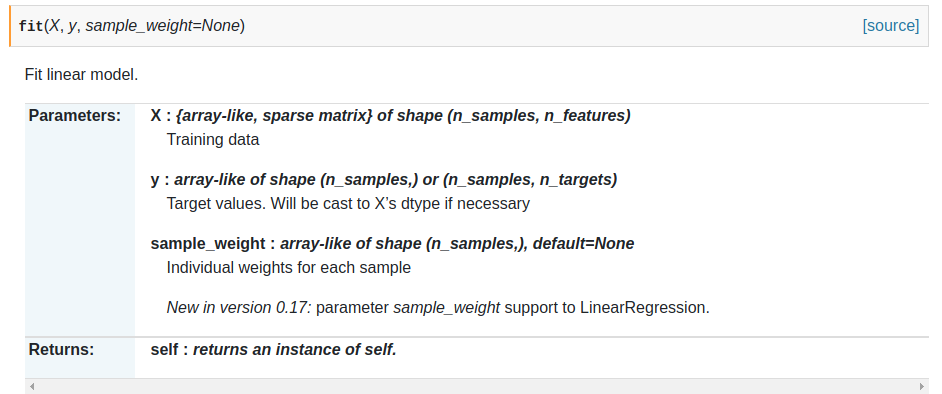

Coeficiente e intersección

In [ ]:
reg.coef_

array([ 0.74394338,  2.03889292,  0.06435555, -0.50292985, -0.11077833,
        0.3528851 ,  0.02062204, -0.14664586, -0.11887699,  0.21366116,
        1.50117723, -4.54056102,  0.21383033, -0.9785225 , -0.09867791,
       -0.07944706])

In [ ]:
reg.intercept_

184.51206700502377

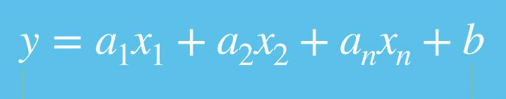

Hacemos nuestra prediccion:

In [ ]:
predict=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

[Error medio cuadrático](https:scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

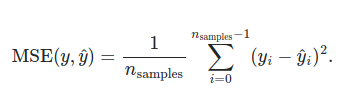

In [ ]:
mean_squared_error(y_test, predict)

50.782964584319046

[Coeficiente de determinación](https:scikit-learn.org/stable/modules/model_evaluation.html#r2-score)

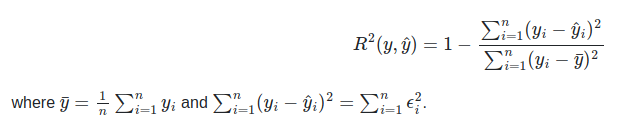

In [ ]:
reg.score(X_train, y_train)

0.8361884178284089

Un R2∼1 indica un buen ajuste de los datos

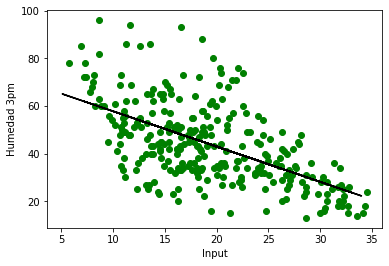

Testeamos:

In [ ]:
X_test[0]

array([9.4000e+00, 1.9200e+01, 0.0000e+00, 2.2000e+00, 1.5000e+01,
       7.3000e+01, 1.0242e+03, 1.0203e+03, 7.0000e+00, 1.0000e+00,
       1.2100e+01, 1.8800e+01, 0.0000e+00, 7.7000e+00, 2.4000e+01,
       4.0000e+00])

In [ ]:
target_0=reg.predict([[9.4, 19.2, 0, 2.2, 15, 73, 1024.2, 1020.3, 7, 1, 12.1 , 18.8,0, 7.7, 24, 4]])
print(int(target_0))

47


In [ ]:
print("Datos Input:", X_test[2]) #Inputs
print("Humedad Real: ", y_test[2]) #Humedad real
test1 = reg.predict ([X_test[2]]) #Humedad prediccion
print("Prediccion: ", int(test1)) #Humedad prediccion

Datos Input: [  12.4   32.1    0.     8.4    9.    70.  1017.9 1012.8    0.     3.
   19.1   30.7    0.    11.1   46.     7. ]
Humedad Real:  22
Prediccion:  25


##Regresión Logistica

$$P(y |x, \beta) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x)}}$$



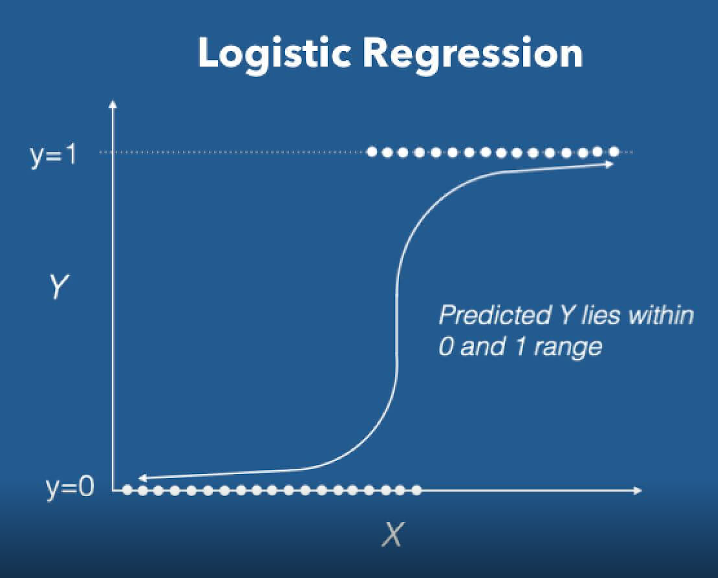

### Vamos a hacer un predictor de si hoy va a llover o no

In [ ]:
curada

,MinTemp,MaxTemp,Rainfall,Evaporation,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,sunshine,windspeed,speed9am
0,8.0,24.3,0.0,3.4,NW,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes,6.3,30.0,6.0
1,14.0,26.9,3.6,4.4,W,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes,9.7,39.0,4.0
2,13.7,23.4,3.6,5.8,NNE,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes,3.3,85.0,6.0
3,13.3,15.5,39.8,7.2,W,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes,9.1,54.0,30.0
4,7.6,16.1,2.8,5.6,ESE,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No,10.6,50.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,NW,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No,12.1,76.0,7.0
362,7.1,28.4,0.0,11.6,NNW,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No,12.7,48.0,2.0
363,12.5,19.9,0.0,8.4,ENE,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No,5.3,43.0,11.0
364,12.5,26.9,0.0,5.0,WNW,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No,7.1,46.0,6.0


In [ ]:
curada_v1=pd.get_dummies(curada, columns=['WindDir3pm'])

In [ ]:
curada_v1 #One hot encoding

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.0,24.3,0.0,3.4,20,68,29,1019.7,1015.0,7,...,0,1,0,0,0,0,0,0,0,0
1,14.0,26.9,3.6,4.4,17,80,36,1012.4,1008.4,5,...,0,0,0,0,0,0,0,1,0,0
2,13.7,23.4,3.6,5.8,6,82,69,1009.5,1007.2,8,...,0,0,0,0,0,0,0,0,0,0
3,13.3,15.5,39.8,7.2,24,62,56,1005.5,1007.0,2,...,0,0,0,0,0,0,0,1,0,0
4,7.6,16.1,2.8,5.6,28,68,49,1018.3,1018.5,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,50,38,15,1016.1,1010.8,1,...,0,1,0,0,0,0,0,0,0,0
362,7.1,28.4,0.0,11.6,19,45,22,1020.0,1016.9,0,...,1,0,0,0,0,0,0,0,0,0
363,12.5,19.9,0.0,8.4,9,63,47,1024.0,1022.8,3,...,0,0,0,0,0,0,0,0,0,0
364,12.5,26.9,0.0,5.0,28,69,39,1021.0,1016.2,6,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
curada_v2=curada_v1.drop(columns=['RainTomorrow'])
curada_v2

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.0,24.3,0.0,3.4,20,68,29,1019.7,1015.0,7,...,0,1,0,0,0,0,0,0,0,0
1,14.0,26.9,3.6,4.4,17,80,36,1012.4,1008.4,5,...,0,0,0,0,0,0,0,1,0,0
2,13.7,23.4,3.6,5.8,6,82,69,1009.5,1007.2,8,...,0,0,0,0,0,0,0,0,0,0
3,13.3,15.5,39.8,7.2,24,62,56,1005.5,1007.0,2,...,0,0,0,0,0,0,0,1,0,0
4,7.6,16.1,2.8,5.6,28,68,49,1018.3,1018.5,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,50,38,15,1016.1,1010.8,1,...,0,1,0,0,0,0,0,0,0,0
362,7.1,28.4,0.0,11.6,19,45,22,1020.0,1016.9,0,...,1,0,0,0,0,0,0,0,0,0
363,12.5,19.9,0.0,8.4,9,63,47,1024.0,1022.8,3,...,0,0,0,0,0,0,0,0,0,0
364,12.5,26.9,0.0,5.0,28,69,39,1021.0,1016.2,6,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
inputs=curada_v2.drop(columns=['RainToday'])
target=np.array(curada_v2['RainToday'])

In [ ]:
inputs=np.array(inputs)
inputs

array([[ 8. , 24.3,  0. , ...,  0. ,  0. ,  0. ],
       [14. , 26.9,  3.6, ...,  1. ,  0. ,  0. ],
       [13.7, 23.4,  3.6, ...,  0. ,  0. ,  0. ],
       ...,
       [12.5, 19.9,  0. , ...,  0. ,  0. ,  0. ],
       [12.5, 26.9,  0. , ...,  0. ,  1. ,  0. ],
       [12.3, 30.2,  0. , ...,  0. ,  1. ,  0. ]])

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
input_minmax = min_max_scaler.fit_transform(inputs)

In [ ]:
input_minmax

array([[0.50763359, 0.59219858, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73664122, 0.68439716, 0.09045226, ..., 1.        , 0.        ,
        0.        ],
       [0.72519084, 0.56028369, 0.09045226, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67938931, 0.43617021, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67938931, 0.68439716, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67175573, 0.80141844, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
target

array(['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'

In [ ]:
curada_v2 = curada_v2.replace ({"RainToday": {"Yes": 1}})
curada_v2 = curada_v2.replace ({"RainToday": {"No": 0}})
target = curada_v2 ["RainToday"]

In [ ]:
target

0      0
1      1
2      1
3      1
4      1
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainToday, Length: 365, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, test_inputs, train_target, test_target= train_test_split(input_minmax, target, test_size= 0.2, random_state=42)

In [ ]:
print('train inputs', train_inputs.shape)
print('train target', train_target.shape)
print('test inputs', test_inputs.shape)
print('test target', test_target.shape)

train inputs (292, 33)
train target (292,)
test inputs (73, 33)
test target (73,)


In [ ]:
reglog=LogisticRegression()

In [ ]:
reglog.fit(train_inputs, train_target)

LogisticRegression()

In [ ]:
pred= reglog.predict(test_inputs)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(test_target, pred)
accuracy

0.8767123287671232

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(test_target,pred)

In [ ]:
cm

array([[56,  0],
       [ 9,  8]])

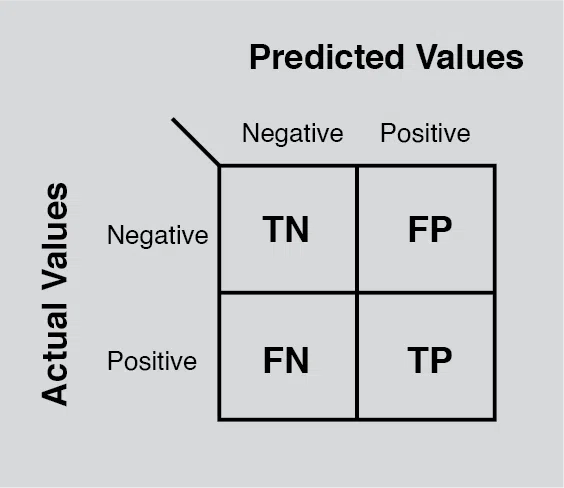

In [ ]:
accuracy

0.8767123287671232

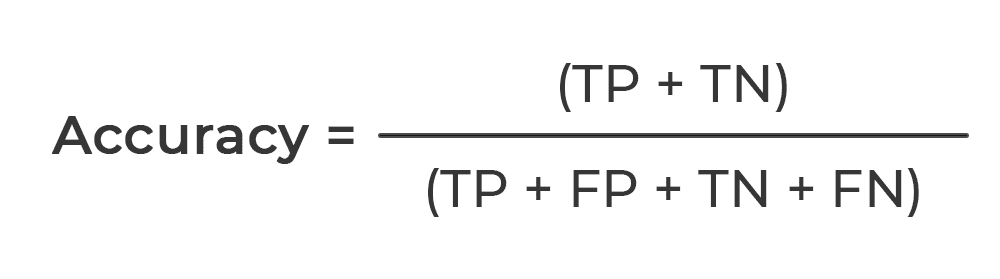

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_target

193    0
33     1
15     0
310    0
57     1
      ..
203    0
82     0
94     0
192    0
326    0
Name: RainToday, Length: 73, dtype: int64

Ojo con esto:

In [ ]:
prueba = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])
prueba

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_prueba =accuracy_score(test_target, prueba)
accuracy_prueba

0.7671232876712328